x =
 [[ 0.1127388 ]
 [ 0.12131038]
 [ 0.36135283]
 [ 0.42621635]
 [ 0.5227758 ]
 [ 0.70964656]
 [ 0.77355779]
 [ 0.86011972]
 [ 1.26229537]
 [ 1.58733367]
 [ 1.89257011]
 [ 2.1570474 ]
 [ 2.18226463]
 [ 2.30064911]
 [ 2.48797164]
 [ 2.5419288 ]
 [ 2.62219172]
 [ 2.62552327]
 [ 2.73690199]
 [ 2.76887617]
 [ 3.13108993]
 [ 3.17336952]
 [ 3.2692991 ]
 [ 3.29288102]
 [ 3.40826737]
 [ 3.41060369]
 [ 3.61658026]
 [ 3.67257434]
 [ 3.70160398]
 [ 3.70581298]
 [ 3.83952613]
 [ 3.87536468]
 [ 4.00060029]
 [ 4.02382722]
 [ 4.09092179]
 [ 4.18578718]
 [ 4.2911362 ]
 [ 4.64540214]
 [ 4.66894051]
 [ 4.68317506]
 [ 4.75035023]
 [ 4.79495139]
 [ 4.99571907]
 [ 5.22007289]
 [ 5.350638  ]
 [ 5.55357983]
 [ 5.66248847]
 [ 5.6680135 ]
 [ 5.78197656]
 [ 5.87171005]]
y =
 [ 0.05437325  0.43710367  0.65611482  0.78304981  0.87329469  1.38088042
  1.23598022  1.49456731  1.81603293  2.03841677  1.84627139  1.54797796
  1.63479377  1.53337832  1.22278185  1.15897721  0.92928812  0.95065638
  0.72022281  0.6923

Fit OK.


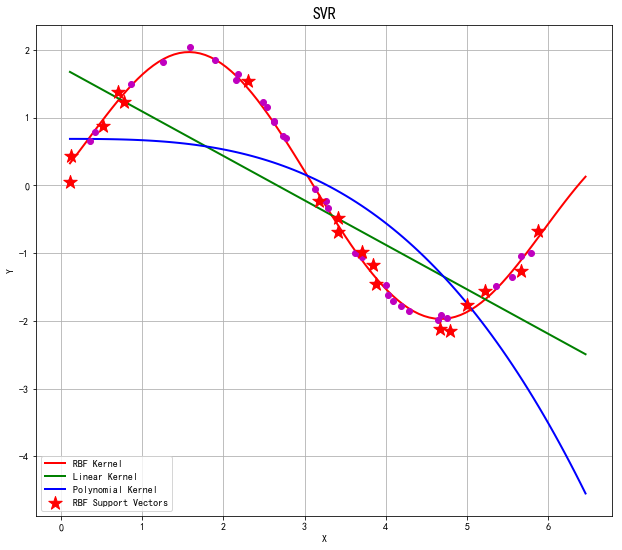

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

N = 50
np.random.seed(0)
x = np.sort(np.random.uniform(0, 6, N), axis=0)
y = 2*np.sin(x) + 0.1*np.random.randn(N)
x = x.reshape(-1, 1)
print('x =\n', x)
print('y =\n', y)

print('SVR - RBF')
svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
svr_rbf.fit(x, y)
print('SVR - Linear')
svr_linear = svm.SVR(kernel='linear', C=100)
svr_linear.fit(x, y)
print('SVR - Polynomial')
svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
svr_poly.fit(x, y)
print('Fit OK.')

# 思考：系数1.1改成1.5
x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(x_test)
y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)

plt.figure(figsize=(9, 8), facecolor='w')
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=200, c='r', marker='*', label='RBF Support Vectors', zorder=10)
plt.legend(loc='lower left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.tight_layout(2)
plt.show()

#2 随机数的SVR回归拟合

x =
 [[ 0.1127388 ]
 [ 0.12131038]
 [ 0.36135283]
 [ 0.42621635]
 [ 0.5227758 ]
 [ 0.70964656]
 [ 0.77355779]
 [ 0.86011972]
 [ 1.26229537]
 [ 1.58733367]
 [ 1.89257011]
 [ 2.1570474 ]
 [ 2.18226463]
 [ 2.30064911]
 [ 2.48797164]
 [ 2.5419288 ]
 [ 2.62219172]
 [ 2.62552327]
 [ 2.73690199]
 [ 2.76887617]
 [ 3.13108993]
 [ 3.17336952]
 [ 3.2692991 ]
 [ 3.29288102]
 [ 3.40826737]
 [ 3.41060369]
 [ 3.61658026]
 [ 3.67257434]
 [ 3.70160398]
 [ 3.70581298]
 [ 3.83952613]
 [ 3.87536468]
 [ 4.00060029]
 [ 4.02382722]
 [ 4.09092179]
 [ 4.18578718]
 [ 4.2911362 ]
 [ 4.64540214]
 [ 4.66894051]
 [ 4.68317506]
 [ 4.75035023]
 [ 4.79495139]
 [ 4.99571907]
 [ 5.22007289]
 [ 5.350638  ]
 [ 5.55357983]
 [ 5.66248847]
 [ 5.6680135 ]
 [ 5.78197656]
 [ 5.87171005]]
y =
 [ 0.05437325  0.43710367  0.65611482  0.78304981  0.87329469  1.38088042
  1.23598022  1.49456731  1.81603293  2.03841677  1.84627139  1.54797796
  1.63479377  1.53337832  1.22278185  1.15897721  0.92928812  0.95065638
  0.72022281  0.6923

验证参数：
 {'C': 35.938136638046259, 'gamma': 0.59948425031894093}


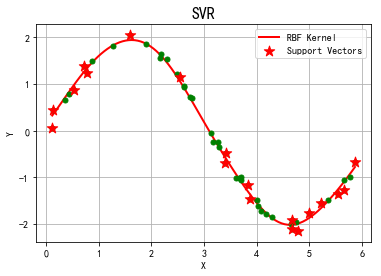

In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV    # 0.17 grid_search
import matplotlib.pyplot as plt

N = 50
np.random.seed(0)
x = np.sort(np.random.uniform(0, 6, N), axis=0)
y = 2*np.sin(x) + 0.1*np.random.randn(N)
x = x.reshape(-1, 1)
print('x =\n', x)
print('y =\n', y)

model = svm.SVR(kernel='rbf')
c_can = np.logspace(-2, 2, 10)
gamma_can = np.logspace(-2, 2, 10)
svr = GridSearchCV(model, param_grid={'C': c_can, 'gamma': gamma_can}, cv=5)
svr.fit(x, y)
print('验证参数：\n', svr.best_params_)

x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_hat = svr.predict(x_test)

sp = svr.best_estimator_.support_
plt.figure(facecolor='w')
plt.scatter(x[sp], y[sp], s=120, c='r', marker='*', label='Support Vectors', zorder=3)
plt.plot(x_test, y_hat, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x, y, 'go', markersize=5)
plt.legend(loc='upper right')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()